In [36]:
import pandas as pd
import numpy as np

In [37]:
data = pd.read_excel("auto_complectations.xlsx")

In [38]:
data.head()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг


## Задание
Вам предлагается набор данных, содержащий комплектации различных моделей автомобилей и их характеристики.Мы предлагаем произвести с данным датасетом следующие операции: 1. Анализ данных, 2. Фильтрация, 3. Преобразование переменных, 4. Классификация моделей по типу кузова (без подклассов, колонка type_car): - Седан - Хетчбек - Кроссовер - Внедорожник. Обосновать выбранный подход/метод машинного обучения. Описать способ оценки качества модели машинного обучения.

### 1. Анализ данных

In [39]:
data.shape

(1703, 21)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   brand                                                 1703 non-null   object
 1   model                                                 1703 non-null   object
 2   complect                                              1703 non-null   object
 3   type_car                                              1703 non-null   object
 4   seats                                                 1703 non-null   int64 
 5   doors                                                 1703 non-null   int64 
 6   Двигатель                                             1703 non-null   object
 7   Мощность                                              1703 non-null   object
 8   Крутящий момент двигателя                             1703 non-null 

In [41]:
data.describe()

,seats,doors
count,1703.000000,1703.000000
mean,5.079272,4.887845
std,0.677096,1.024259
min,1.000000,2.000000
25%,5.000000,4.000000
50%,5.000000,5.000000
75%,5.000000,5.000000
max,9.000000,8.000000


Здесь у нас лишь две колонки, так как в остальных колонках числовые значения записаны вместе с единицей измерения

In [42]:
data.isna().any()

brand                                                    False
model                                                    False
complect                                                 False
type_car                                                 False
seats                                                    False
doors                                                    False
Двигатель                                                False
Мощность                                                 False
Крутящий момент двигателя                                False
Коробка передач                                          False
Привод                                                   False
Разгон до сотни                                          False
Максимальная скорость                                    False
Расход топлива (л/100 км)\nгород / трасса / смешанный    False
Дорожный просвет                                         False
Габариты (длина × ширина × высота)                     

На данный момент у нас нет пропусков в значениях

In [43]:
data['type_car'].value_counts()

Компактный кроссовер                          379
Среднеразмерный кроссовер                     236
Большой внедорожник                           129
Большой кроссовер                             115
Седан класса E                                104
Седан класса D                                 93
Седан класса B                                 91
Седан класса F                                 68
Вэн                                            53
Седан класса C                                 53
Хэтчбек класса B                               40
Компактвэн                                     39
Среднеразмерный внедорожник                    30
Хэтчбек класса C                               29
Хэтчбек класса D                               26
Пикап                                          26
Кроссовер класса B                             24
Хэтчбек класса E                               20
Универсал класса E                             16
Купе класса D                                  16


In [44]:
data.loc[0]

brand                                                                             Audi
model                                                                         A3 Sedan
complect                                                                 1.4 TFSI 7AMT
type_car                                                                Седан класса C
seats                                                                                5
doors                                                                                4
Двигатель                                                        бензиновый (1395 см³)
Мощность                                                                     150 л. с.
Крутящий момент двигателя                                                      250 Н·м
Коробка передач                                          роботизированная (7 ступеней)
Привод                                                                        передний
Разгон до сотни                            

### 2. Фильтрация данных
Если перед нами стоит задача определить класс автомобиля по типу кузова, то, по логике, нас должны интересеовать лишь признаки, как-то коррелирующие с размером самого авто.

Поэтому оставим лишь следующие признаки
`seats`, `doors`, `Дорожный просвет`, `Габариты`, `Колёснаябаза`, `Объём багажника`, `Объём багажника максимальный`, `Масса авто`

In [137]:
slice = data.loc[:, ['seats', 'type_car', 'doors', 'Дорожный просвет', 'Габариты (длина × ширина × высота)', 
             'Колёсная база', 'Объём багажника', 'Объём багажника максимальный', 'Масса автомобиля']]

In [138]:
df = pd.DataFrame(slice)

In [139]:
df

,seats,type_car,doors,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Масса автомобиля
0,5,Седан класса C,4,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,1320 кг
1,5,Седан класса C,4,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,1320 кг
2,5,Седан класса C,4,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,1395 кг
3,5,Седан класса C,4,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,1465 кг
4,5,Седан класса C,4,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,1395 кг
...,...,...,...,...,...,...,...,...,...
1698,5,Большой кроссовер,5,237 мм,4950 × 2008 × 1776,2984 мм,721 л,1899 л,1969 кг
1699,7,Большой кроссовер,5,237 мм,4950 × 2008 × 1776,2984 мм,692 л,1899 л,2004 кг
1700,7,Большой кроссовер,5,237 мм,4950 × 2008 × 1776,2984 мм,692 л,1899 л,2009 кг
1701,7,Большой кроссовер,5,237 мм,4950 × 2008 × 1776,2984 мм,640 л,1899 л,2350 кг


Нам нужно изменить столбцы
- `Дорожный просвет` убрать единицы измерения
- `Габариты` поменять на 3 колонки `Длина`, `Ширина` и `Высота`
- Для `Колёсной базы`, `Объёма багажника`, `Макс. объёма багажника`, и `Массы авто.` убрать единицы измерения

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
df['Дорожный просвет'].str.contains('мм').all()

True

In [142]:
df['Колёсная база'].str.contains('мм').all()

True

Во всех строках Lорожный просвет и Колёсная база измеряются в мм

In [143]:
df['Объём багажника'].str.contains('л').all()

True

In [144]:
df['Объём багажника максимальный'].str.contains('л').all()

True

In [145]:
df['Масса автомобиля'].str.contains('кг').all()

True

Объём багажника тоже измеряется только в литрах, масса - в кг

In [146]:
def del_units(x):
    x = x.split()[0]
    return int(x)

In [147]:
cols_tochange = ['Дорожный просвет', 'Колёсная база', 'Объём багажника', 'Объём багажника максимальный', 'Масса автомобиля']

In [148]:
for i in cols_tochange:
    df[i] = df[i].map(del_units)

In [149]:
df.head()

,seats,type_car,doors,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Масса автомобиля
0,5,Седан класса C,4,165,4458 × 1796 × 1416,2637,425,880,1320
1,5,Седан класса C,4,165,4458 × 1796 × 1416,2637,425,880,1320
2,5,Седан класса C,4,165,4458 × 1796 × 1416,2637,425,880,1395
3,5,Седан класса C,4,165,4458 × 1796 × 1416,2637,390,845,1465
4,5,Седан класса C,4,165,4458 × 1796 × 1416,2637,425,880,1395


In [152]:
df.dtypes

seats                                  int64
type_car                              object
doors                                  int64
Дорожный просвет                       int64
Габариты (длина × ширина × высота)    object
Колёсная база                          int64
Объём багажника                        int64
Объём багажника максимальный           int64
Масса автомобиля                       int64
dtype: object

<AxesSubplot:xlabel='Дорожный просвет', ylabel='Count'>

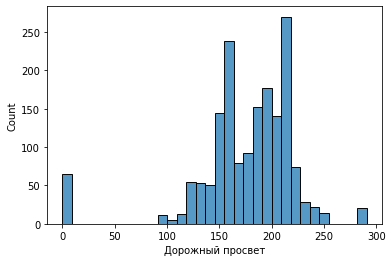

In [157]:
sns.histplot(df, x='Дорожный просвет')